<a href="https://colab.research.google.com/github/alicodes-dotcom/TSF_DS-BA_TASKS/blob/main/TASK_2_DS_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TSF GRIP MAR2021**
#**FUNCTION: DS&BA**
#**NAME: MOHAMMED WAJAHATH ALI**
#***ORGANISATION: THE SPARKS FOUNDATION***

#**TASK-2: Prediction using Unsupervised ML**

##**QS: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

#STEP-1: IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#STEP-2: IMPORTING 'IRIS' DATASET

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##REMOVING ID AND SPECIES COLUMNS BECAUSE 'ID' IS A DISCRETE VARIABLE AND 'SPECIES' IS WHICH WE ARE GOING TO PREDICT. 

In [4]:
df = df.drop(['Id', 'Species'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#STEP-3: TO FIND OPTIMUM NUMBER OF CLUSTERS FOR K-MEANS

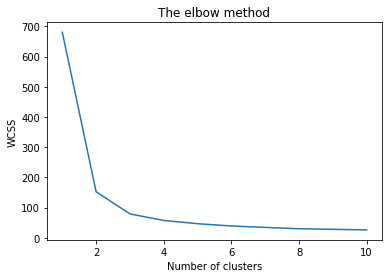

In [8]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
#wcss= within clusters sum of squares
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


# Plotting a line graph to find the elbow curve.

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#**As we can see the elbow curve from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In this case we chose '3'**

#STEP-4: APPLYING K-MEANS TO THE DATASET

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)

## VISUALIZING THE RESULTS

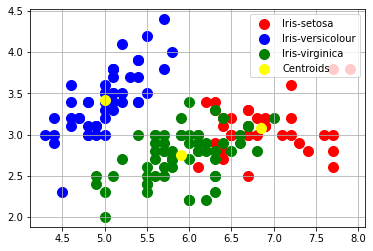

In [19]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.legend(loc = 'upper right')

##THANK YOU!